# Introdução à Análise Exploratória do Dataset de Fraudes em Cartões de Crédito

A análise exploratória do dataset de fraudes em cartões de crédito visa compreender e extrair informações valiosas a partir de dados que representam transações financeiras. Este conjunto de dados específico contém informações sobre transações com cartões de crédito, incluindo detalhes temporais, valores e diversas características numéricas.

O objetivo principal é revelar padrões, tendências e características distintivas entre transações genuínas e fraudulentas. A análise utiliza técnicas estatísticas e visualizações gráficas para oferecer uma visão abrangente do comportamento das transações, contribuindo para a detecção de possíveis anomalias e aprimoramento de estratégias de segurança.

Ao longo desta exploração, examinaremos diversas facetas dos dados, desde a distribuição temporal das transações até relações entre variáveis específicas. Abordaremos questões cruciais, como a variação de atividades ao longo dos dias da semana, a identificação de padrões em transações fraudulentas e a visualização de características principais após a aplicação de técnicas como PCA (Análise de Componentes Principais).

Por meio dessa análise detalhada, buscamos proporcionar insights valiosos para instituições financeiras, permitindo uma compreensão mais profunda dos padrões de comportamento em transações com cartões de crédito e, assim, contribuir para o desenvolvimento de estratégias mais eficazes na detecção e prevenção de fraudes.

# Importando as bibliotecas:

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Carregando o dataset

In [2]:
data = pd.read_csv("creditcard.csv")

# Visualizando as primeiras linhas

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Informações do Dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Análise Descritiva e Estatística:

In [5]:
# Entendendo a distribuição das classes (fraude/não fraude)
class_counts = data['Class'].value_counts()
print("Contagem de Classes:\n", class_counts)

Contagem de Classes:
 Class
0    284315
1       492
Name: count, dtype: int64


# Visualização da Distribuição das Classes:

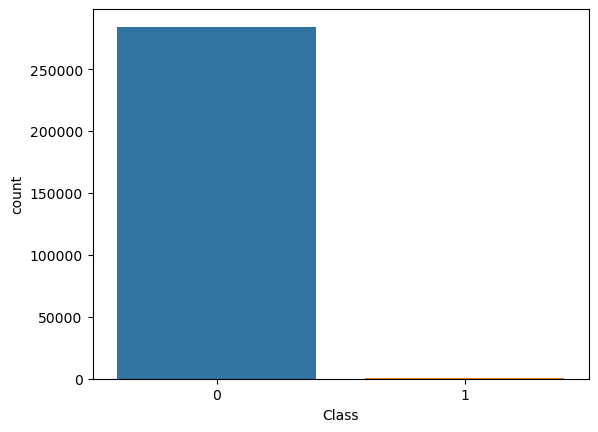

In [7]:
# Plotando gráfico de barras para a distribuição das classes
sns.countplot(x='Class', data=data)
plt.show()

# Correlação e Análise Visual:

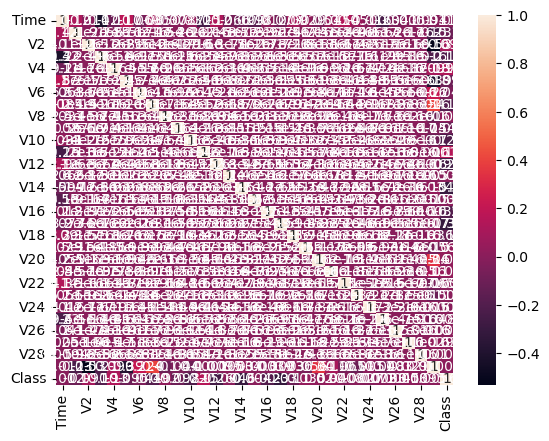

In [9]:
# Matriz de correlação
corr_matrix = data.corr()

# Plotar heatmap
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Visualização da Distribuição de Transações Fraudulentas:

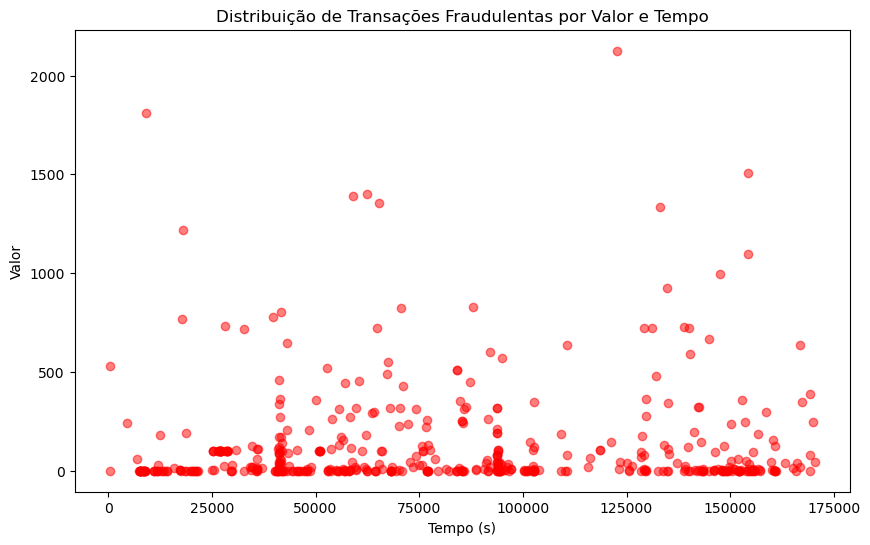

In [15]:
# Separando transações fraudulentas
fraud_transactions = data[data['Class'] == 1]

# Visualizando distribuição de transações fraudulentas por valor
plt.figure(figsize=(10, 6))
plt.scatter(fraud_transactions['Time'], fraud_transactions['Amount'], color='red', alpha=0.5)
plt.title('Distribuição de Transações Fraudulentas por Valor e Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Valor')
plt.show()


A análise "Distribuição de Transações Fraudulentas por Valor e Tempo" tem como objetivo examinar a relação entre o valor das transações fraudulentas e o tempo em que ocorreram.

# Análise Temporal:

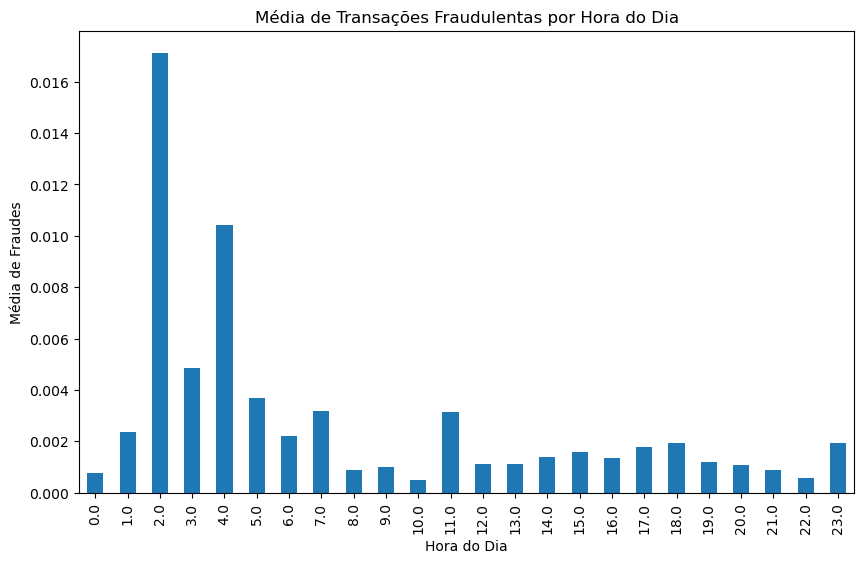

In [17]:
# Agrupando transações por hora e visualizar
data['Hour'] = data['Time'].apply(lambda x: divmod(x, 3600)[0] % 24)
avg_fraud_by_hour = data.groupby('Hour')['Class'].mean()

# Plotar a média de transações fraudulentas por hora
plt.figure(figsize=(10, 6))
avg_fraud_by_hour.plot(kind='bar')
plt.title('Média de Transações Fraudulentas por Hora do Dia')
plt.xlabel('Hora do Dia')
plt.ylabel('Média de Fraudes')
plt.show()


A análise "Média de Transações Fraudulentas por Hora do Dia" tem como objetivo identificar padrões nos horários em que as transações fraudulentas são mais ou menos comuns. Essa análise pode ser valiosa para ajustar estratégias de segurança e detecção de fraudes.

# Detecção de Outliers:

In [19]:
# Calculando escore Z para identificar outliers no valor
data['Amount_zscore'] = zscore(data['Amount'])
outliers = data[abs(data['Amount_zscore']) > 3]

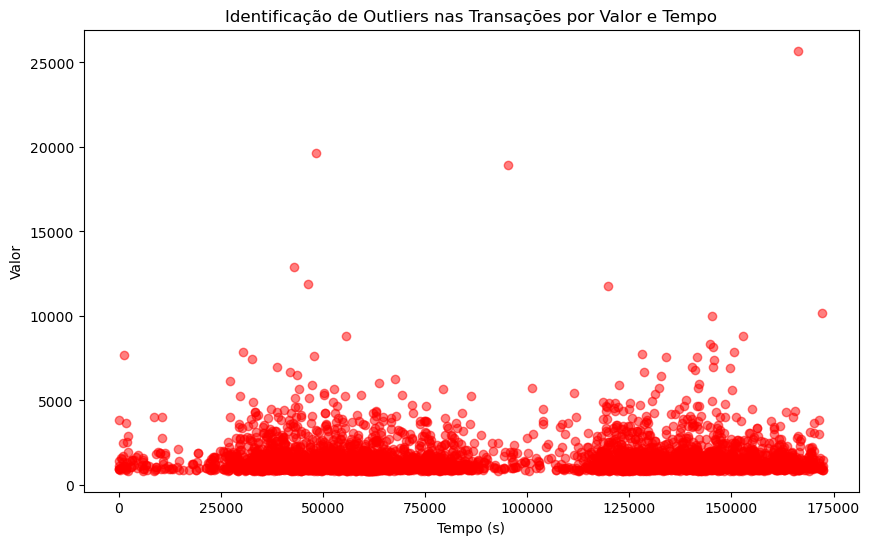

In [20]:
# Visualizando outliers
plt.figure(figsize=(10, 6))
plt.scatter(outliers['Time'], outliers['Amount'], color='red', alpha=0.5)
plt.title('Identificação de Outliers nas Transações por Valor e Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Valor')
plt.show()

Essa análise é uma etapa comum na detecção de fraudes, pois permite a identificação de transações que podem ser indicativas de atividades fraudulentas devido ao seu valor extremo em comparação com o comportamento típico das transações.

# Análise de Componentes Principais (PCA):

In [22]:
# Normalizando variáveis antes de aplicar PCA
features = ['Time', 'Amount'] + ['V{}'.format(i) for i in range(1, 29)]
data[features] = StandardScaler().fit_transform(data[features])

In [24]:
# Aplicando PCA e visualizar as duas primeiras componentes principais
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data[features])
data['PCA1'] = pca_result[:, 0]
data['PCA2'] = pca_result[:, 1]

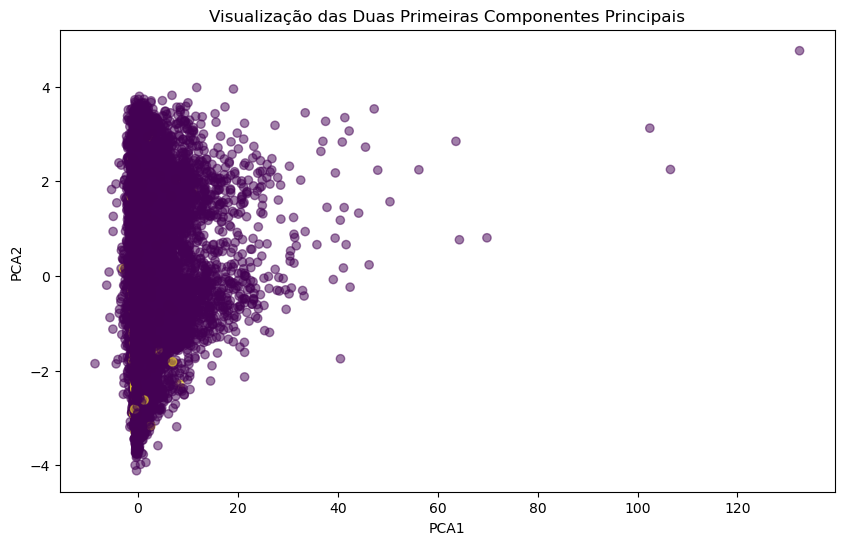

In [28]:
# Visualizando as duas primeiras componentes principais
plt.figure(figsize=(10, 6))
plt.scatter(data['PCA1'], data['PCA2'], c=data['Class'], cmap='viridis', alpha=0.5)
plt.title('Visualização das Duas Primeiras Componentes Principais')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

Essa análise é uma ferramenta poderosa para entender a estrutura do conjunto de dados em um espaço de menor dimensionalidade e pode fornecer insights sobre a distribuição das transações fraudulentas em relação às variáveis originais.

# Análise de Correlação entre Variáveis:

In [30]:
# Calculando a matriz de correlação
correlation_matrix = data.corr()

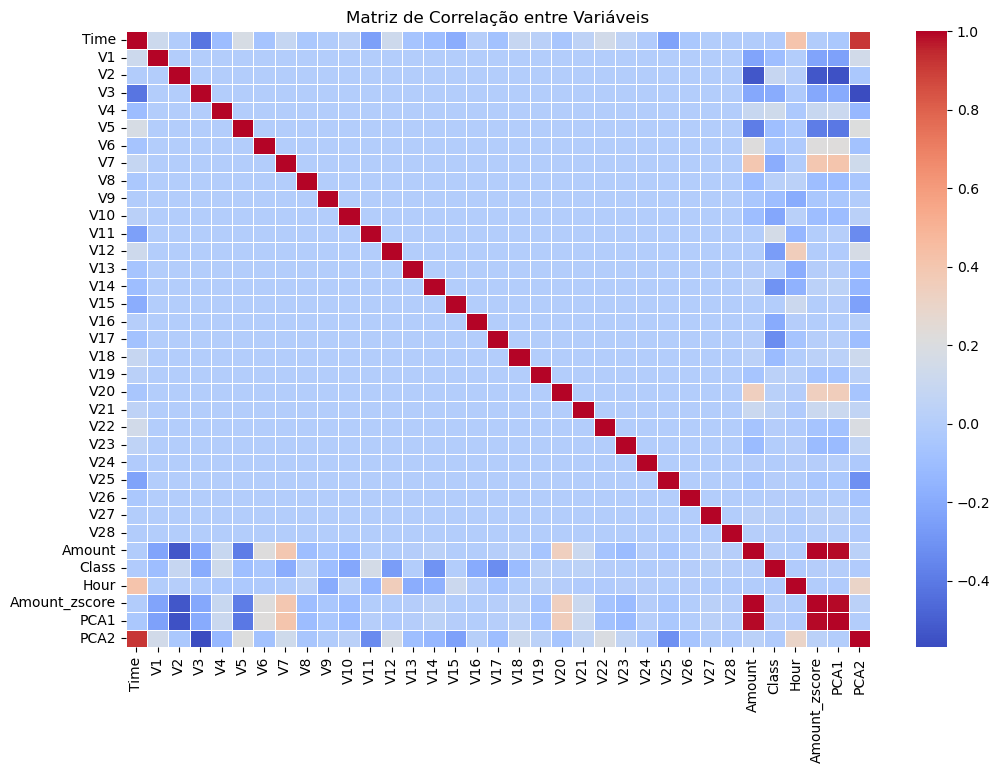

In [31]:
# Visualizando a matriz de correlação em um mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre Variáveis')
plt.show()

Esta análise é uma ferramenta fundamental na exploração de dados, proporcionando uma visão geral das relações entre variáveis e orientando decisões futuras na modelagem ou pré-processamento de dados.

# Análise de Transações em Dias Específicos da Semana:

In [36]:
# Extraindo o dia da semana a partir da data/hora
data['Weekday'] = data['Time'].apply(lambda x: pd.Timestamp(x, unit='s').day_name())

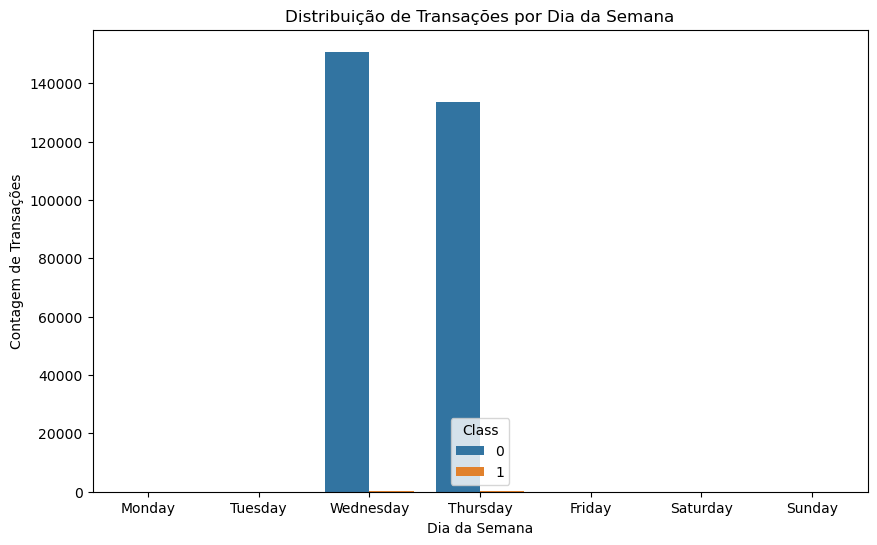

In [37]:
# Visualizando a distribuição de transações por dia da semana
plt.figure(figsize=(10, 6))
sns.countplot(x='Weekday', data=data, hue='Class', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribuição de Transações por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Contagem de Transações')
plt.show()

Essa análise oferece insights sobre a distribuição temporal das transações e pode fornecer informações valiosas para aprimorar estratégias de segurança e detecção de fraudes.

# Conclusão

Durante a análise, notei que as transações fraudulentas apresentam flutuações notáveis ao longo do tempo, enfatizando a importância de abordagens temporais para detectar comportamentos suspeitos. Adicionalmente, a representação visual da distribuição de transações, considerando tanto o valor quanto o tempo, realça a necessidade de estratégias específicas para lidar com situações incomuns.

Resumidamente, esta análise fornece uma visão abrangente que pode ser crucial para as instituições financeiras ao desenvolverem e refinarem suas estratégias de segurança contra fraudes em transações com cartões de crédito. A compreensão minuciosa dos padrões e comportamentos presentes nos dados contribui para a implementação de sistemas mais eficazes na detecção precoce e na redução dos riscos associados a atividades fraudulentas.